# 3.7 Exercises


## 8)

This question involves the use of simple linear regression on the `Auto` data set.

(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from patsy import dmatrices

In [21]:
auto = pd.read_csv('data/Auto.csv', header=0)
auto = auto[auto['horsepower'] != "?"]

auto['horsepower'] = pd.to_numeric(auto['horsepower'])

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

results.summary()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           7.03e-81
Time:                        02:07:41   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
i. Is there a relationship between the predictor and the response?
  
* The F-Statistic is much larger than 1 and the p-value is very close to 0 so we can reject the null hypothesis.     
    
ii. How strong is the relationship between the predictor and the response?

* The R-squared value is 0.606 so the there is a fairly strong relationship. ~60% of the variance in MPG can be explained by horsepower. 

iii. Is the relationship between the predictor and the response positive or negative?

* There is a negative relationship between them since the horsepower coefficient is below 0.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?



In [30]:
# Predict MPG for a given horsepower value
horsepower_value = [1, 98]  # [constant, horsepower]
predicted_mpg = results.predict(horsepower_value)
print('Predicted MPG:', predicted_mpg)

# Calculate confidence and prediction intervals
prediction_results = results.get_prediction(horsepower_value)
confidence_interval = prediction_results.conf_int(alpha=0.05)
print('95% Confidence Interval:')
print(confidence_interval)

# Calculate prediction interval (95%)
n = x.shape[0]  # Number of samples
t_value = 1.96  # For 95% confidence interval
standard_error = prediction_results.se_mean
prediction_interval = [
    predicted_mpg - t_value * standard_error,
    predicted_mpg + t_value * standard_error
]
prediction_interval = [i[0] for i in prediction_interval]
print('95% Prediction Interval:')
print(prediction_interval)



Predicted MPG: [24.46707715]
95% Confidence Interval:
[[23.97307896 24.96107534]]
95% Prediction Interval:
[23.9746029500891, 24.959551354935762]


b)  Plot the response and the predictor. Display the least squares regression line.

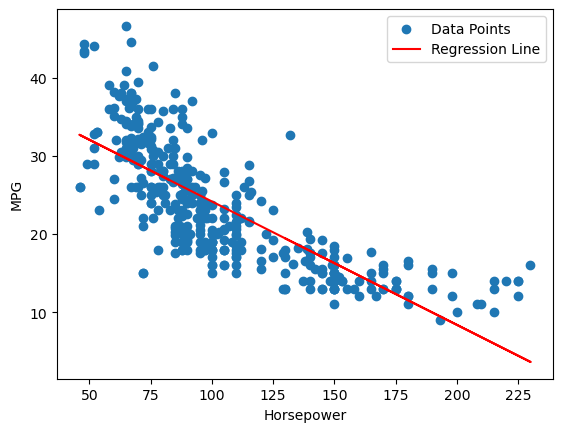

In [31]:
# Scatter plot of data points
plt.scatter(x['horsepower'], y, label='Data Points')

# Plot the regression line
plt.plot(x['horsepower'], results.fittedvalues, 'r', label='Regression Line')

# Labeling axes and adding legend
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

# Show the plot
plt.show()

c)  Produce diagnostic plots of the least squares regression fit.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


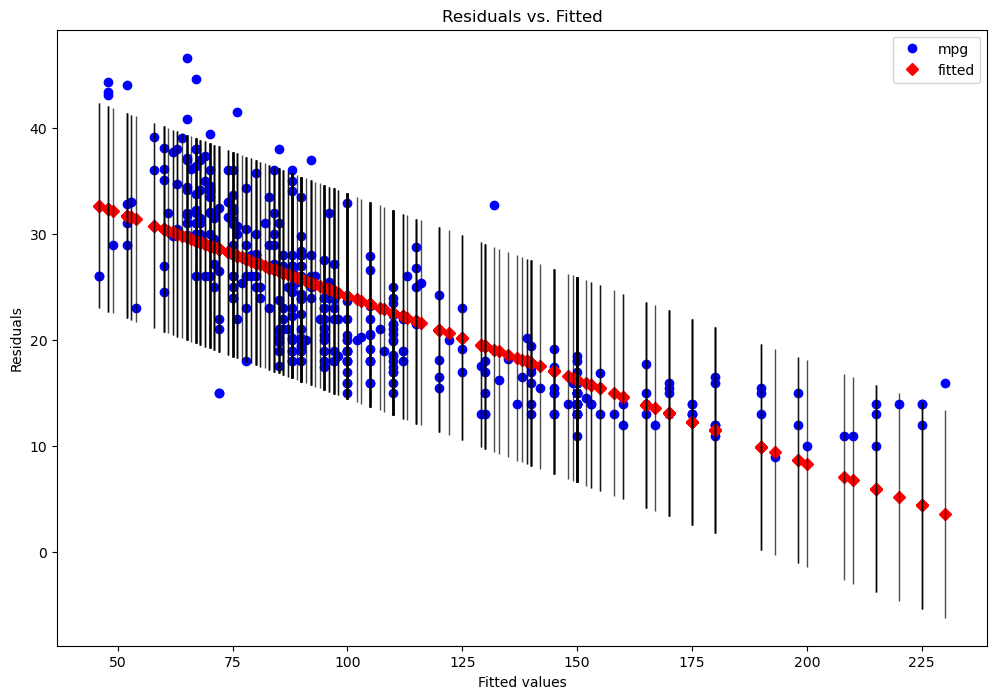

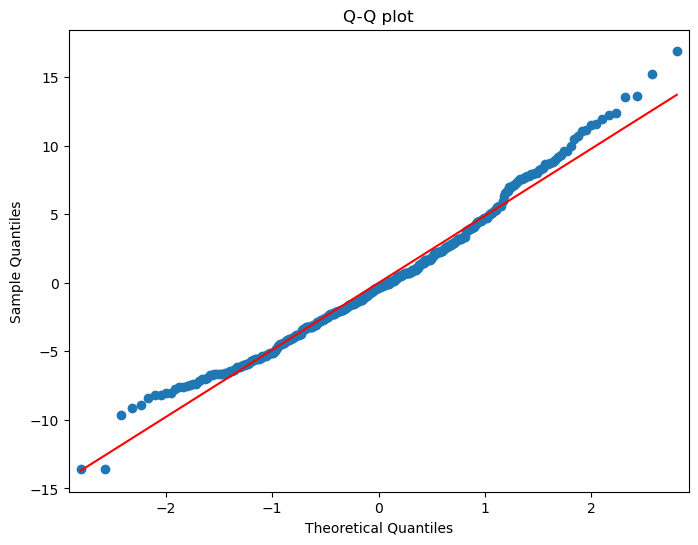

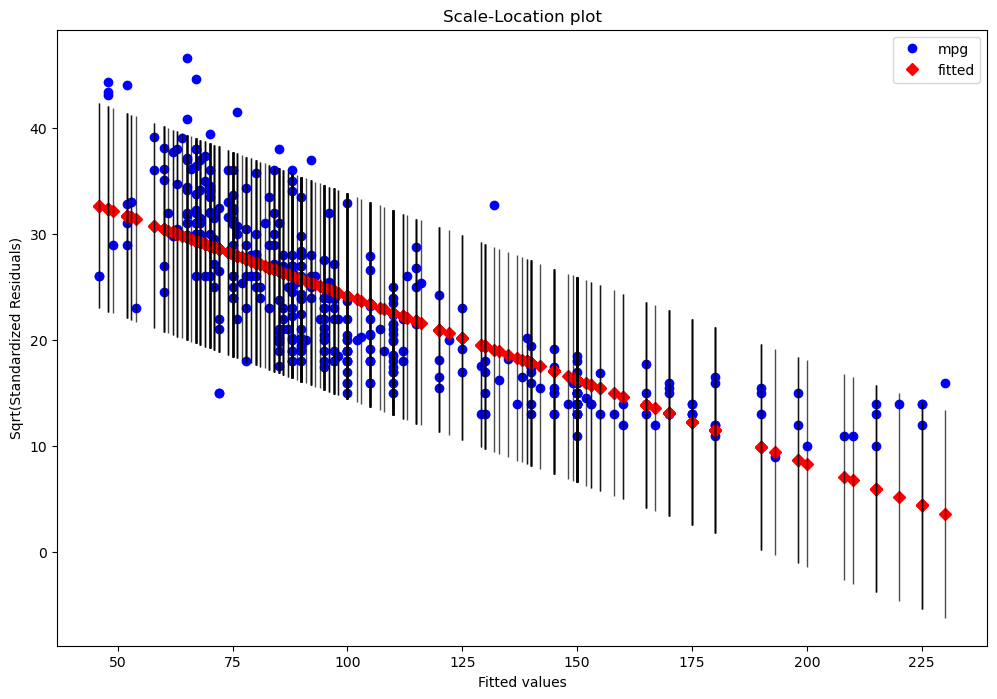

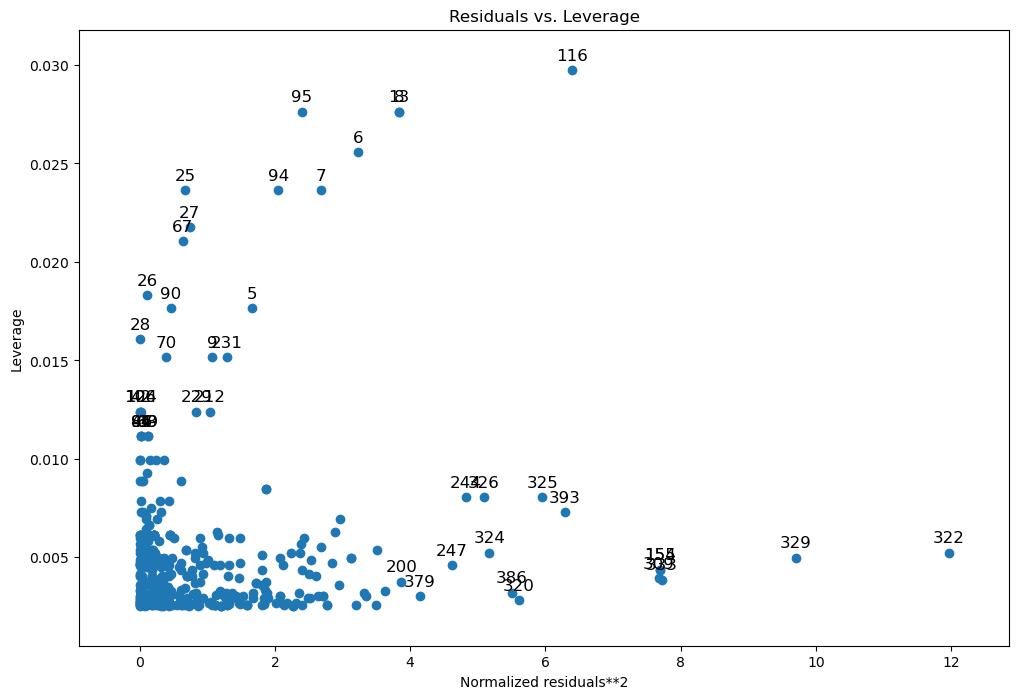

In [36]:
import statsmodels.graphics.regressionplots as smg

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

# Create diagnostic plots
fig, ax = plt.subplots(figsize=(12, 8))

# Residuals vs. Fitted plot
smg.plot_fit(results, 1, ax=ax)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted')

# Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(results.resid, line='s', ax=ax)
ax.set_title('Q-Q plot')

# Scale-Location plot
fig, ax = plt.subplots(figsize=(12, 8))
smg.plot_fit(results, 1, ax=ax)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Sqrt(Standardized Residuals)')
ax.set_title('Scale-Location plot')

# Residuals vs. Leverage plot
fig, ax = plt.subplots(figsize=(12, 8))
smg.plot_leverage_resid2(results, ax=ax)
ax.set_title('Residuals vs. Leverage')

# Show the plots
plt.show()

There seem to be slight tails in the normal distribution. Which causes some skew. 